# Run pyUCell on test data

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

Install development version of pyucell using:
%pip install git+https://github.com/carmonalab/pyucell.git@master

In [2]:
import pyucell

Load a test dataset

In [3]:
adata = sc.datasets.pbmc3k()

In [4]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

Define two simple signatures to test

In [5]:
signatures = {
    "Tcell": ["CD3D", "CD3E", "CD2"],
    "Bcell": ["MS4A1", "CD79A", "CD79B"],
    "CD4T": ["CD2", "CD4+", "CD40LG+", "CD8A-", "CD8B-"],
    "CD8T": ["CD4-", "CD40LG-", "CD8A+", "CD8B+"],
}

Run UCell!

In [9]:
pyucell.compute_ucell_scores(adata, signatures=signatures, chunk_size=500)

In [10]:
adata.obs

,Tcell_UCell,Bcell_UCell,CD4T_UCell,CD8T_UCell
index,,,,
AAACATACAACCAC-1,0.599688,0.000000,0.000000,0.770771
AAACATTGAGCTAC-1,0.000000,0.856030,0.000000,0.000000
AAACATTGATCAGC-1,0.902982,0.000000,0.477971,0.000000
AAACCGTGCTTCCG-1,0.191366,0.000000,0.191366,0.000000
AAACCGTGTATGCG-1,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
TTTCGAACTCTCAT-1,0.000000,0.000000,0.000000,0.000000
TTTCTACTGAGGCA-1,0.000000,0.626391,0.000000,0.000000
TTTCTACTTCCTCG-1,0.000000,0.802403,0.000000,0.000000


Visualize on UMAP

In [8]:
# Normalize total counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)
# Log1p transform
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)  # optional scaling before PCA
sc.tl.pca(adata, svd_solver="arpack", n_comps=50)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

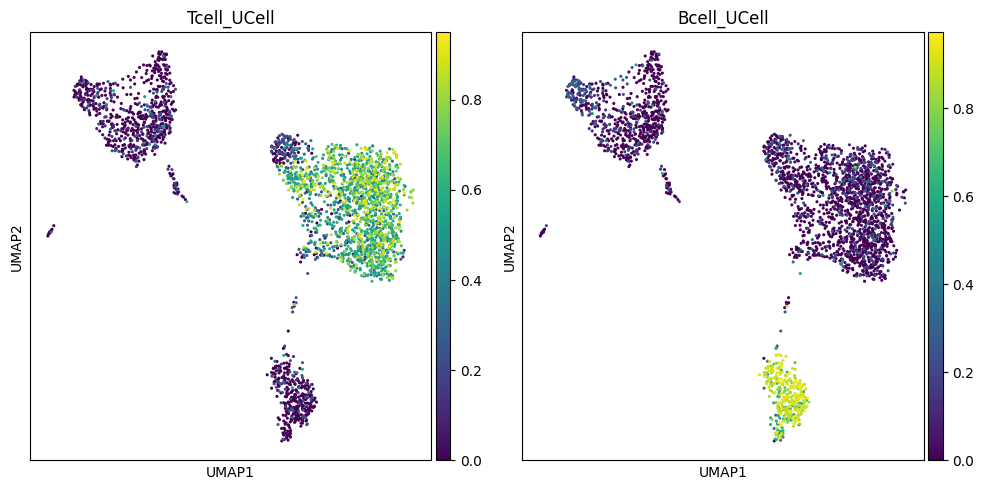

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sc.pl.umap(adata, color="Tcell_UCell", cmap="viridis", ax=axes[0], size=20, show=False)
sc.pl.umap(adata, color="Bcell_UCell", cmap="viridis", ax=axes[1], size=20, show=False)
plt.tight_layout()
plt.show()

Missing genes

In [11]:
signatures = {
    "Tcell": ["CD3D", "CD3E", "CD2"],
    "Tcell2": ["CD3D", "CD3E", "CD2", "notagene"],
}
pyucell.compute_ucell_scores(adata, signatures=signatures, missing_genes="impute")
adata.obs

,Tcell_UCell,Bcell_UCell,CD4T_UCell,CD8T_UCell,Tcell2_UCell
index,,,,,
AAACATACAACCAC-1,0.599688,0.000000,0.000000,0.770771,0.449917
AAACATTGAGCTAC-1,0.000000,0.856030,0.000000,0.000000,0.000000
AAACATTGATCAGC-1,0.902982,0.000000,0.477971,0.000000,0.677462
AAACCGTGCTTCCG-1,0.191366,0.000000,0.191366,0.000000,0.143573
AAACCGTGTATGCG-1,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.000000,0.000000,0.000000,0.000000,0.000000
TTTCTACTGAGGCA-1,0.000000,0.626391,0.000000,0.000000,0.000000
TTTCTACTTCCTCG-1,0.000000,0.802403,0.000000,0.000000,0.000000


In [12]:
signatures = {
    "Tcell": ["CD3D", "CD3E", "CD2"],
    "Tcell2": ["CD3D", "CD3E", "CD2", "notagene"],
}
pyucell.compute_ucell_scores(adata, signatures=signatures, missing_genes="skip")
adata.obs

,Tcell_UCell,Bcell_UCell,CD4T_UCell,CD8T_UCell,Tcell2_UCell
index,,,,,
AAACATACAACCAC-1,0.599688,0.000000,0.000000,0.770771,0.599688
AAACATTGAGCTAC-1,0.000000,0.856030,0.000000,0.000000,0.000000
AAACATTGATCAGC-1,0.902982,0.000000,0.477971,0.000000,0.902982
AAACCGTGCTTCCG-1,0.191366,0.000000,0.191366,0.000000,0.191366
AAACCGTGTATGCG-1,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.000000,0.000000,0.000000,0.000000,0.000000
TTTCTACTGAGGCA-1,0.000000,0.626391,0.000000,0.000000,0.000000
TTTCTACTTCCTCG-1,0.000000,0.802403,0.000000,0.000000,0.000000
